# Assignment 5 – Machine Learning in Python

**Author**: Nikhil 
**Date**: 7/24/25 
**Environment**: See `environment.yml`  
**Description**:  
This notebook explores basic machine learning using [scikit-learn/pandas/numpy/matplotlib/statsmodels/etc.], including data preparation, model training, and evaluation.


In [1]:
from scipy.stats import linregress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data as a table and pandas data-frame

In [2]:
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")

In [3]:
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


In [4]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [5]:
pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


In [6]:
data.shape

(40, 8)

In [7]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [8]:
print(data['Gender'])

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [9]:
data[data['Gender'] == 'Female']['VIQ'].mean()

np.float64(109.45)

In [10]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [11]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


In [12]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [13]:
#mean value
data['VIQ'].mean()
print(data['VIQ'].mean())

112.35


In [14]:
#number of females in the study
data[data['Gender'] == 'Female'].count()

Unnamed: 0    20
Gender        20
FSIQ          20
VIQ           20
PIQ           20
Weight        20
Height        20
MRI_Count     20
dtype: int64

In [15]:
#number of males in the study
data[data['Gender'] == 'Male'].count()

Unnamed: 0    20
Gender        20
FSIQ          20
VIQ           20
PIQ           20
Weight        18
Height        19
MRI_Count     20
dtype: int64

In [16]:
#avg MRI count by gender
data['logMRI'] = np.log10(data['MRI_Count'])
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['MRI_Count']:
    print((gender, value.mean()))

('Female', np.float64(862654.6))
('Male', np.float64(954855.4))


## Plotting Data

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

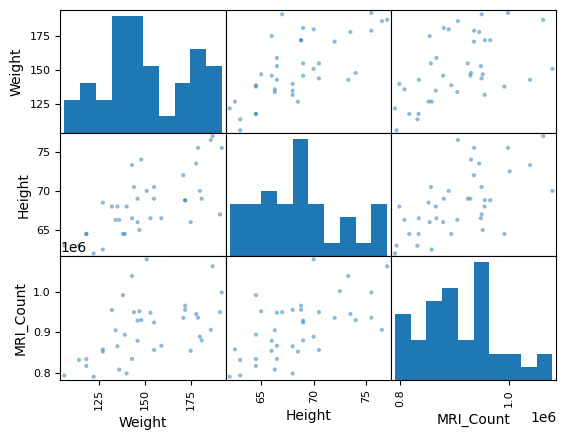

In [17]:
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

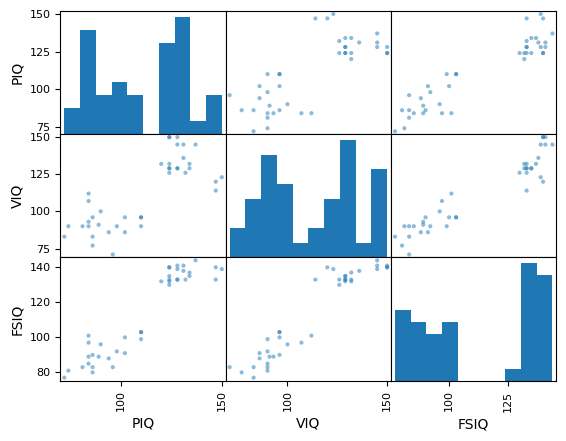

In [18]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])   

Female         Axes(0.1,0.15;0.363636x0.75)
Male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

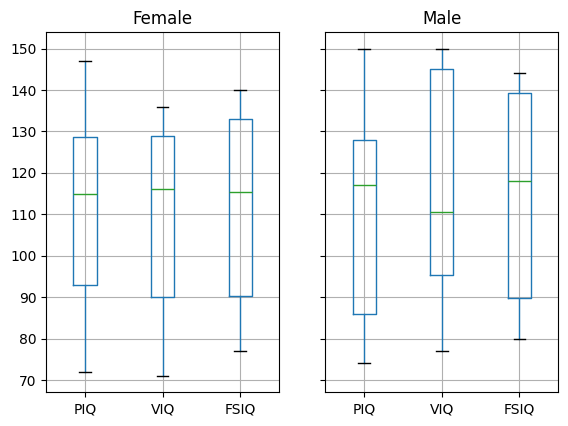

In [19]:
groupby_gender = data.groupby('Gender')
groupby_gender.boxplot(column=['PIQ', 'VIQ', 'FSIQ'])

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>,
        <Axes: xlabel='logMRI', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>,
        <Axes: xlabel='logMRI', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>,
        <Axes: xlabel='logMRI', ylabel='MRI_Count'>],
       [<Axes: xlabel='Weight', ylabel='logMRI'>,
        <Axes: xlabel='Height', ylabel='logMRI'>,
        <Axes: xlabel='MRI_Count', ylabel='logMRI'>,
        <Axes: xlabel='logMRI', ylabel='logMRI'>]], dtype=object)

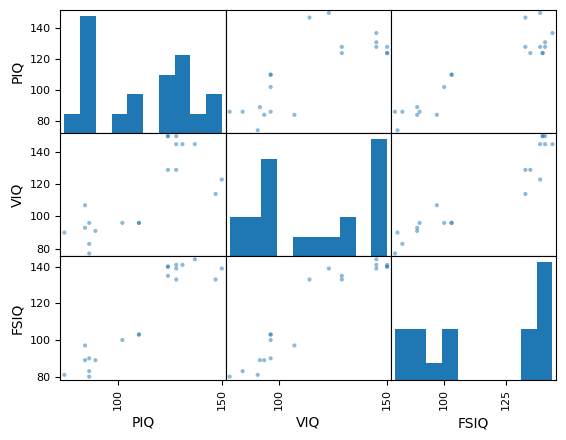

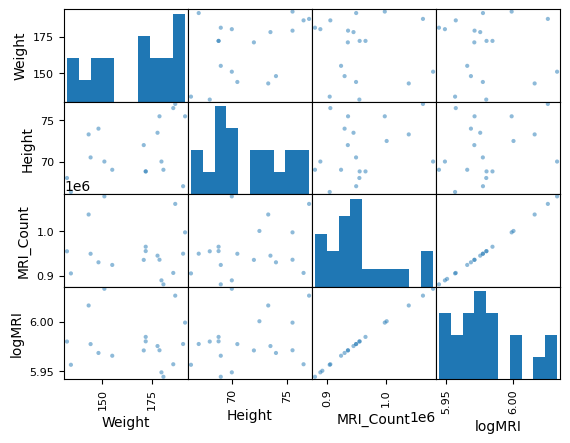

In [20]:
#creat scatter matrices for weight, height and MRI count
df = pd.DataFrame(data)
df_male = df[df['Gender'] == 'Male']
plotting.scatter_matrix(df_male[['PIQ', 'VIQ', 'FSIQ']])
plotting.scatter_matrix(df_male[['Weight', 'Height', 'MRI_Count', 'logMRI']])

## Hypothesis Testing: Comparing Two Groups

### Student's t-test

In [21]:
from scipy import stats

In [22]:
stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

In [23]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

### Paired tests

In [24]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

In [25]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   


TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

In [26]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   


TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

In [27]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])   

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

## Exercise 3

In [28]:
# Separate groups
male_viq = data[data['Gender'] == 'Male']['VIQ']
female_viq = data[data['Gender'] == 'Female']['VIQ']

# Perform Mann-Whitney U test (nonparametric)
u_stat, p_value = stats.mannwhitneyu(male_viq, female_viq, alternative= 'two-sided')

print("Mann-Whitney U test p-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("There is a statistically significant difference in VIQ between males and females")
else:
    print("There is no statistically significant difference in VIQ between males and females. As such, the data does not support the hypothesis that VIQ differs between males and females")

Mann-Whitney U test p-value: 0.3422886868727315
There is no statistically significant difference in VIQ between males and females. As such, the data does not support the hypothesis that VIQ differs between males and females


## Linear models, multiple factors, and analysis of variance

### "formulas" to specify statistical models in Python

In [29]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

In [30]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [31]:
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           8.56e-08
Time:                        12:31:09   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

### Exercise 4

In [32]:
print(model.params)

Intercept   -5.533459
x            2.936888
dtype: float64


In [33]:
model.params
intercept = model.params['Intercept']
print (intercept)

-5.533458545842917


In [34]:
data = pd.read_csv('examples/brain_size.csv', sep=';', na_values=".")

In [35]:
model = ols("VIQ ~ Gender + 1", data).fit()

print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 24 Jul 2025   Prob (F-statistic):              0.445
Time:                        12:31:09   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [36]:
model = ols('VIQ ~ C(Gender)', data).fit()
data_fisq = pd.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})

data_piq = pd.DataFrame({'iq': data['PIQ'], 'type': 'piq'})

data_long = pd.concat((data_fisq, data_piq))

print(data_long)  

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [37]:
from statsmodels.formula.api import ols
model = ols("iq ~ type", data_long).fit()

In [38]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

### Multiple Regression: including multiple factors

In [39]:
data = pd.read_csv('examples/iris.csv')

model = ols('sepal_width ~ name + petal_length', data).fit()

print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.58e-20
Time:                        12:31:10   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

### Post-hoc hypothesis testing: analysis of variance (ANOVA)

In [40]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.245335346574177, p=0.0736905878170114, df_denom=146, df_num=1>


### Exercise 5

In [ ]:
# Run linear regression model
model = ols("VIQ ~ Gender + MRI_Count + Height + Weight", data).fit()

#Print summar to check if Gender is statistically significant
print(model.summary())

## Seaborn for statistical exploration

### Pairplot: scatter matrices

In [43]:
# Standard library imports
import urllib.request
import os

import matplotlib.pyplot as plt

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

/tmp/slurmtmp.1834910/ipykernel_4086697/377285638.py:29: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,


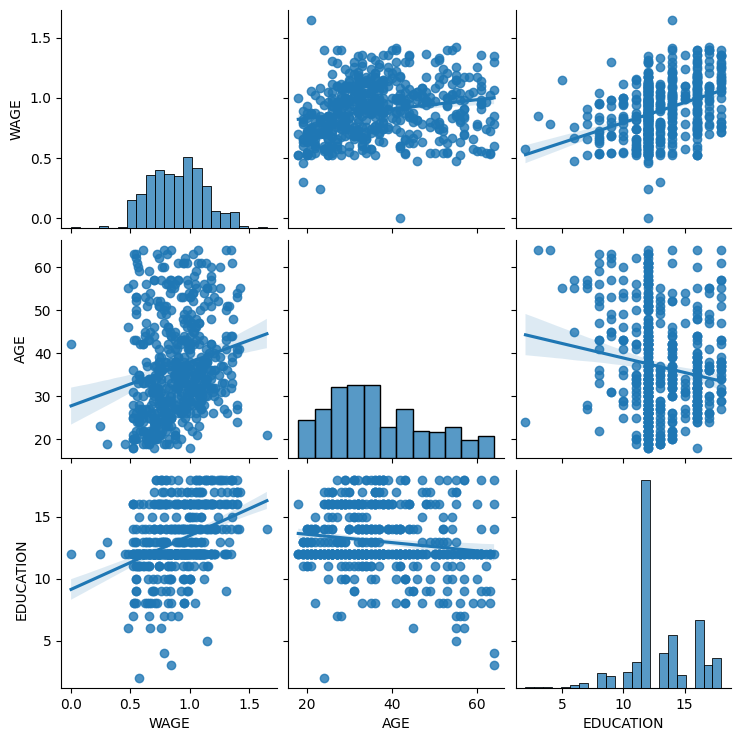

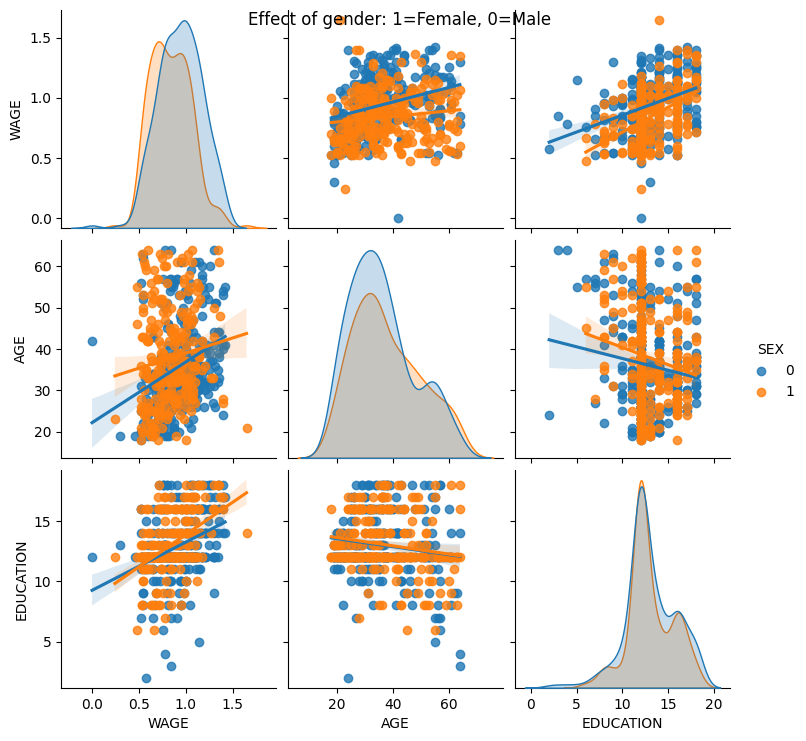

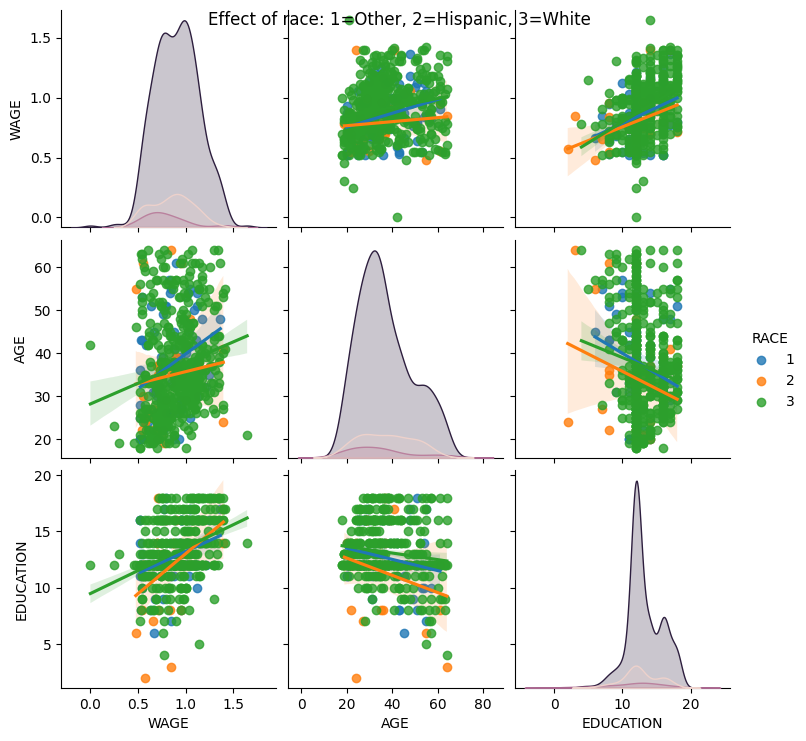

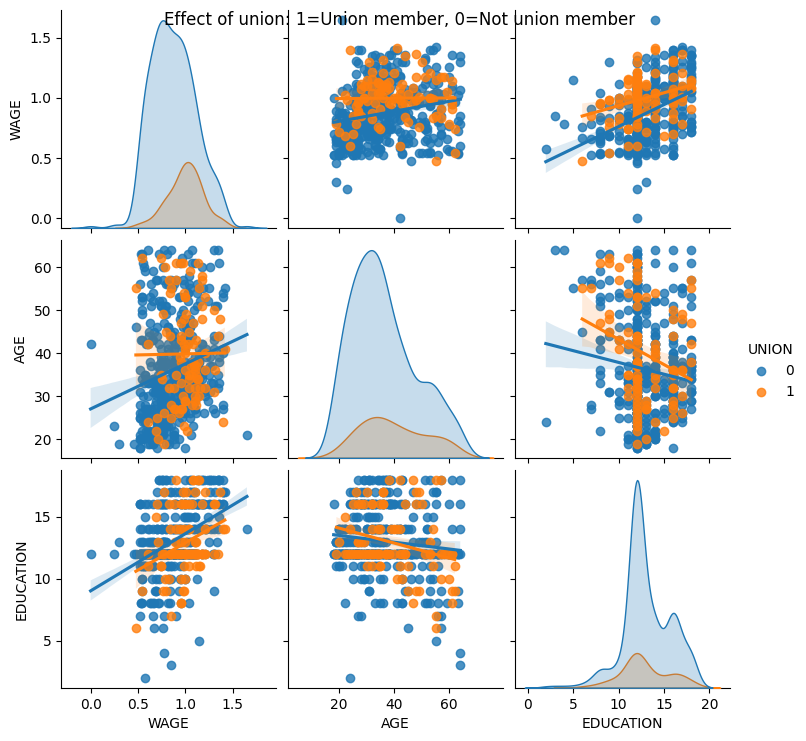

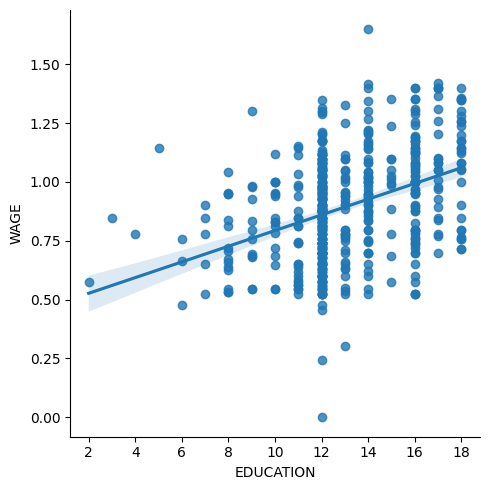

In [44]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member') 
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

plt.show()

In [45]:
from matplotlib import pyplot as plt
plt.rcdefaults()

### lmplot: plotting a univariate regression

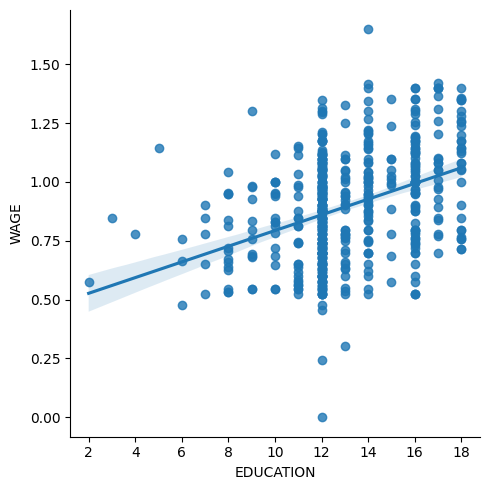

In [46]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

plt.show()

## Testing for interactions

In [49]:
import statsmodels.formula.api as smf
result = smf.ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           2.94e-25
Time:                        12:35:39   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.5748      0.058      9.861